<a href="https://colab.research.google.com/github/Anna-Battaglia/MLPNS_ABattaglia/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pylab as pl

In [3]:
X = np.array(
    [[0,0,1],
     [1,1,1],
    [1,0,1],
     [0,1,1,]]
)
X 

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

(-0.5, 2.5, 3.5, -0.5)

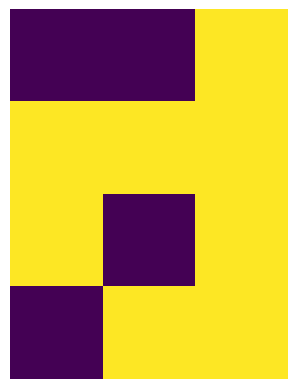

In [4]:
pl.imshow(X)
pl.axis('off')

In [5]:
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [6]:
y.shape

(4, 1)

In [7]:
#Vogliamo predirre l'output sulla base di questo input
print('input\n',X)
print('output\n',y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#basic architecture :1 layer
4 osservazioni

3 neuroni

1 layer

In [8]:
def sigmoid(x):
  return 1./(1.+np.exp(-x))

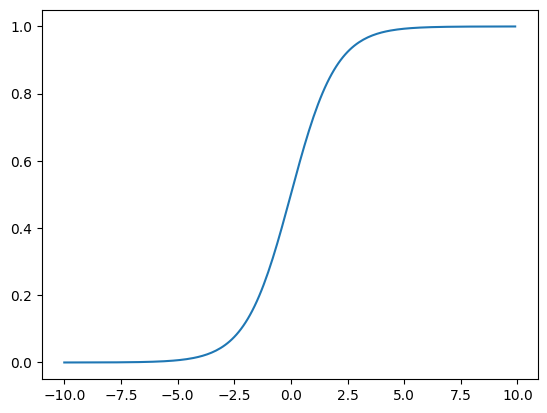

In [9]:
pl.plot(np.arange(-10,10,0.1),sigmoid(np.arange(-10,10,0.1))) 

In [29]:
#definiamo la loss function: in questo caso è molto semplice ma non sempre sarà così

def loss(prediction,target):
  return target - prediction 

In [11]:
def dsigmoid(x): #definiamo la derivata
  return x*(1. -x)

##Neural network

In [12]:
np.random.seed(302) #se non setto un seme il risultato non è riproducibile

training = 6000

In [20]:
np.random.seed(302)
2*np.random.random((3,1)) -1

#np.random.random return random floats in the half-open interval [0.0, 1.0)

array([[ 0.27256242],
       [ 0.65008468],
       [-0.31671053]])

In [21]:
#layer of synopses / neurons
# 4 x 3 

np.random.seed(302)

syn0 = 2*np.random.random((3,1)) -1 # sono i pesi: normalizzato tra -1 e 1 
print(syn0.shape)
print(syn0)

loss_output = []

for iter in range(training):
  inputLayer = X

  #forward propagation
  #linear regression
  l1 = np.dot(inputLayer,syn0)
  #activations
  output = sigmoid(l1)

#calcoliamo la correzione sui pesi delle sinapsi
#calculate error
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())
#calculate corrections
  output_delta = output_error * dsigmoid(output)
#apply correction to weights
  syn0 +=np.dot(inputLayer.T, output_delta) #correzione sui pesi delle sinapsi


print('output after training\n',output)
print('output target\n',y)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


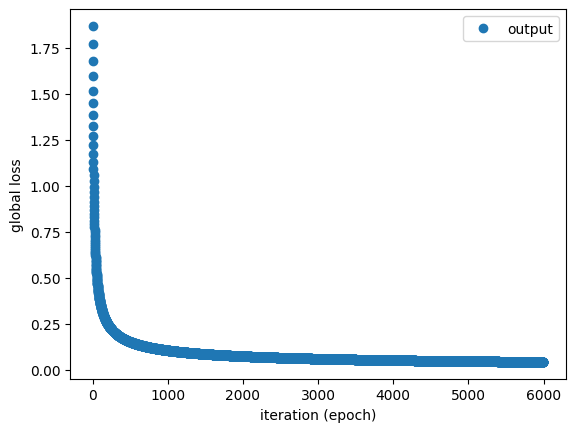

In [25]:
pl.plot(loss_output, 'o', label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('global loss');

In [31]:
syn0

array([[-3.22165194,  3.43969394, -0.58162708,  2.7518911 , -3.43936046],
       [ 0.14754469,  0.14165048, -0.80194267, -0.6258268 , -0.00729567],
       [ 1.13320049, -1.44613933,  0.54355811, -0.53295857,  1.34697598]])

In [32]:
np.random.seed(302)
W1=2*np.random.random((3,5)) -1
W2=2*np.random.random((5,1)) -1

In [33]:
np.random.seed(302)
#back propagation
#in questo caso ho un hidden layer i 5 neuroni

# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalized 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalized 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  hidden = sigmoid(l1)

  l2 = np.dot(hidden, syn1)
  #activations
  output = sigmoid(l2)

  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)

  # MODIFIED: error on the first layer 
  hidden_error = output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden)

  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.00648042]
 [0.99370941]
 [0.99426848]
 [0.00489822]]
output target
 [[0]
 [1]
 [1]
 [0]]


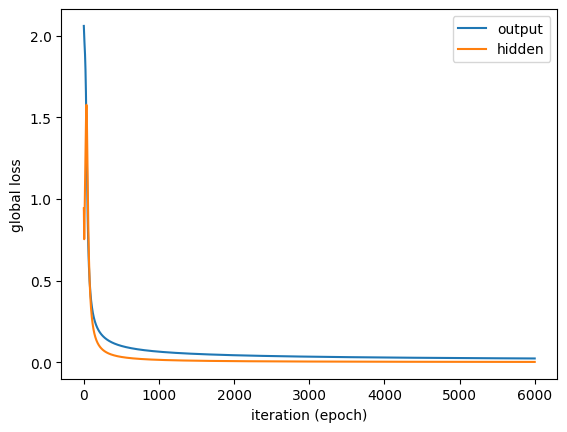

In [34]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss");

#27/04

In [36]:
from tensorflow import keras

In [ ]:
#creo il modello:
hlayer = keras.layers.Dense(5,input_dim=3, activation='sigmoid') #hidden layer , 5 neuroni in output
olayer = keras.layers.Dense(1, activation='linear')
model=keras.Sequential([hlayer,olayer]) #prende come argomento la lista dei layer che ho creato
#no loop e connnessioni tra i layers, vado in una sola direzione
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilazione del modello:
model.compile(loss='mae', optimizer='adam', metrics=['accuracy', 'mae'])

In [35]:
model.fit(X,y,epochs=1000); #qui viene monitorata la loss function

NameError: ignored

In [ ]:
#oredizione sul training data:
model.predict(X)

1/1 [==============================] - 0s 141ms/step


array([[ 0.00139907],
       [ 1.0000188 ],
       [ 0.9976555 ],
       [-0.00229231]], dtype=float32)

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
keras.layers.